## 어려웠던것들
1. boundary condition 적용 유무
2. "absolute" magnetization 때문에..
    책에서는 그냥 magnetization이라고해서 너무 햇갈렸음
3. symmetry 사용


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [57]:
class Ising:
    def __init__(self,L,intv = 25,J = 1,B = 0):
        self.L = L
        self.N = L*L
        self.intv = intv
        self.T = [(5/self.intv)*(k+1) for k in range(self.intv)]
        self.J = J
        self.B = B
        self.cnt = 0
        self.ZU = np.zeros(intv,dtype=np.double)
        self.Z = np.zeros(intv,dtype=np.double)
        self.E2 = np.zeros(intv,dtype=np.double)
        self.E = np.zeros(intv,dtype=np.double)
        self.sc = np.ones(self.N,dtype=np.int0)

    def sweep(self): #Non-periodic
        self.cnt += 1
        res = 0
        for i in range(self.N):
            sum = 0

            nn = i + 1
            if(nn % self.L != 0):
                sum += self.sc[nn]
                # print(nn,sum)

            nn = i - 1
            if((nn+1) % self.L != 0):
                sum += self.sc[nn]
                # print(nn,sum)

            nn = i + self.L
            if(nn < self.N):
                sum += self.sc[nn]
                # print(nn,sum)

            nn = i - self.L
            if(nn >= 0):
                sum += self.sc[nn]
                # print(nn,sum)

            res += self.J*sum*self.sc[i]

        sigma = np.sum(self.sc)
        HH = -int(res/2) -self.B*sigma
        print(sigma,HH)
        for k in range(self.intv):
            ex = np.exp(-HH/self.T[k])
            self.ZU[k] += np.absolute(sigma)*ex
            self.Z[k] += ex
            self.E[k] += HH*ex
            self.E2[k] += HH*HH*ex
    
    def sweep2(self): # periodic
        self.cnt += 1
        res = 0
        for i in range(self.N):
            sum = 0

            nn = i + 1
            if(nn % self.L == 0): nn -= self.L
            sum += self.sc[nn]
                # print(nn,sum)

            nn = i + self.L
            if(nn >= self.N): nn -= self.N
            sum += self.sc[nn]
                # print(nn,sum)

            res += self.J*sum*self.sc[i]

        sigma = np.sum(self.sc)
        HH = -res -self.B*sigma
        # print(sigma,HH)
        for k in range(self.intv):
            ex = np.exp(-HH/self.T[k])
            self.ZU[k] += np.absolute(sigma)*ex
            self.Z[k] += ex
            self.E[k] += HH*ex
            self.E2[k] += HH*HH*ex
    
    def calc(self):
        self.mag = self.magnetization()
        self.spec = self.specific_heat()

    def magnetization(self): # not per spin
        res = np.zeros(self.intv)
        for i in range(self.intv):
            res[i] = self.ZU[i]/self.Z[i]
        return res
    
    def specific_heat(self):
        res = np.zeros(self.intv)
        for i in range(self.intv):
            res[i] = self.E2[i]/self.Z[i] - (self.E[i]/self.Z[i])**2
        return res

    def plot_mag(self):
        y = self.mag/max(self.mag)

        plt.style.use('seaborn-whitegrid')
        plt.ylim(0,1.1)
        plt.xlim(0,5)
        plt.plot(self.T,y)

        plt.ylabel('Abosolute magnetization per spin m')
        plt.xlabel('Temperature T')
        plt.show()
    
    def plot_spec(self):
        y = self.spec/max(self.spec)

        plt.style.use('seaborn-whitegrid')
        plt.ylim(0,1.1)
        plt.xlim(0,5)
        plt.plot(self.T,y)

        plt.ylabel('Specific heat per spin m')
        plt.xlabel('Temperature T')
        plt.show()


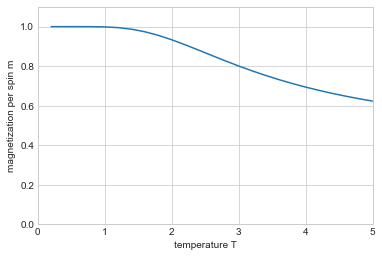

In [58]:
L22 = Ising(2)
L22.generator_sym()
L22.plot()

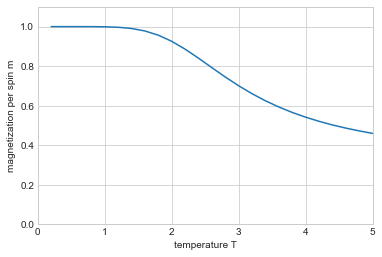

In [59]:
L33 = Ising(3)
L33.generator_sym()
L33.plot()

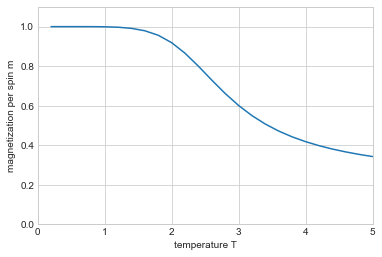

In [60]:
L44 = Ising(4)
L44.generator_sym()
L44.plot()

In [61]:
L55 = Ising(5)
L55.generator_sym()
L55.plot()